# Weryfikacja prognoz eksperckich zapotrzebowania na gaz

**Problem:** Weryfikacja (epistemicznych) prognoz eksperckich jest trudna, ponieważ nie można ich klasycznie ocenić po fakcie ani zestawić z kompletnymi danymi pomiarowymi. W artykule autorzy proponują metodę weryfikacji takiej prognozy w oparciu o analizę niepewności. W tym celu autorzy zestawiają dwie niezależne prognozy krajowego zużycia gazu: pierwszą, opracowaną przez operatora przesyłowego GAZ-SYSTEM na podstawie wiedzy ekspertów, oraz drugą, wygenerowaną z historycznych danych sektorowych przy użyciu hybrydowej symulacji łączącej rozkłady możliwości i prawdopodobieństwa. Aby umożliwić spójną analizę wyników, obie prognozy opisano matematycznie za pomocą p-boxów, które przedstawiają całe zakresy możliwych wartości wraz z odpowiadającą im wiarygodnością. Takie ujęcie pozwala oddzielić i oszacować dwa rodzaje niepewności, które obciążają prognozę: epistemiczną, wynikającą z niedostatecznej wiedzy lub uproszczeń modelu, oraz aleatoryczną, związaną z naturalną losowością zjawisk, takich jak zmienność pogody czy koniunktura gospodarcza. Porównanie zakresów p-boxów pokazuje, w jakim stopniu prognoza ekspercka pozostaje spójna ze statystycznie opisanym zachowaniem systemu; wskazuje także, czy ewentualne rozbieżności biorą się głównie z niewiedzy, czy z nieuchronnej przypadkowości. Dzięki temu podejściu możliwa staje się systematyczna ocena jakości prognoz nawet wtedy, gdy brakuje danych do ich bezpośredniej walidacji, a także wskazanie obszarów, w których warto inwestować w dokładniejsze modele lub lepsze zbiory danych.


**Dane:**
- *Dane popytowe* zapotrzebowanie na gaz wg sektorów jest stąd:(źródło [tekst linku](https://www.forum-energii.eu/rocznik-dane-o-energetyce)). Trzeba je zweryfikować danymi [Dane GUSu](https://stat.gov.pl/wyszukiwarka/?query=tag:zu%C5%BCycie+gazu+ziemnego)
- *Dane podazowe* prognoza Gaz-System, ale tu z kolei tutaj twierdzą, że prognozy nie są wystarczające: [tekst linku](https://wysokienapiecie.pl/107903-czy-polsce-wystarczy-gazu-rzadowe-prognozy-wymagaja-wielkiej-wiary/) i trzeba coś dodać. Do sprawdzenia.




## Przygotowanie danych popytowych



In [ ]:
import pandas as pd
from io import StringIO

data = """
Rok	Przemysł (PJ)	Gospodarstwa domowe (PJ)	Prod, ciepła zawodowa (PJ)	Prod, ciepła przemysłowa (PJ)	Transport (PJ)	Prod, energii el, zawodowa (PJ)	Prod, energii el, przemysłowa (PJ)	Pozostałe	Zużycie ogółem (PJ)
2014	236,5	131,6	17,6	57,4	17,4	23,3	8	65,2	557
2015	249,2	132,2	21,5	54,8	17,8	28,9	7,2	69,1	580,7
2016	241,8	145,2	22,7	60,2	18,1	32,4	13,7	77,5	611,6
2017	262,9	152	25,2	70,3	17,7	34,7	19,7	63,6	646,1
2018	259,1	149,1	25,6	69,3	22,8	34,3	37,4	79,4	677
2019	257,1	152,3	26,5	75,4	18,1	36,8	46,1	99,5	711,8
2020	261,1	160,8	29,7	76,8	16,5	46,9	49,8	76,4	718
2021	257,8	191,2	34	78,9	15,2	51,6	39,7	95	763,4
2022	207,6	181,7	37,7	69,2	6,5	31,1	33,8	62,4	630
2023	208,5	191,1	44,9	73,7	7,3	48,4	43,7	30,0	647,6
"""

# Replace commas with dots for correct float conversion
data = data.replace(",", ".")

# Read the data into a DataFrame
df_sektor = pd.read_csv(StringIO(data), sep="\t")

df_sektor


,Rok,Przemysł (PJ),Gospodarstwa domowe (PJ),Prod. ciepła zawodowa (PJ),Prod. ciepła przemysłowa (PJ),Transport (PJ),Prod. energii el. zawodowa (PJ),Prod. energii el. przemysłowa (PJ),Pozostałe,Zużycie ogółem (PJ)
0,2014,236.5,131.6,17.6,57.4,17.4,23.3,8.0,65.2,557.0
1,2015,249.2,132.2,21.5,54.8,17.8,28.9,7.2,69.1,580.7
2,2016,241.8,145.2,22.7,60.2,18.1,32.4,13.7,77.5,611.6
3,2017,262.9,152.0,25.2,70.3,17.7,34.7,19.7,63.6,646.1
4,2018,259.1,149.1,25.6,69.3,22.8,34.3,37.4,79.4,677.0
5,2019,257.1,152.3,26.5,75.4,18.1,36.8,46.1,99.5,711.8
6,2020,261.1,160.8,29.7,76.8,16.5,46.9,49.8,76.4,718.0
7,2021,257.8,191.2,34.0,78.9,15.2,51.6,39.7,95.0,763.4
8,2022,207.6,181.7,37.7,69.2,6.5,31.1,33.8,62.4,630.0
9,2023,208.5,191.1,44.9,73.7,7.3,48.4,43.7,30.0,647.6


### Wizualizacja historycznego popytu na gaz

1. Na wykresie wizualizacja historycznego zużycia gazu w sektorach. Bieżemy tylko dane za 10 lat, bo zmiany polityczne (nowe rządy - nowe podejscie), polityka Unii, zmiany zewnętrzne oraz zmiany w miksie powodują, że branie dłuższego szeregu czasowego nie ma sensu. Trzeba to uzasadnić w artykule.
2. Dane są mocno zakłócone przez COVID, wojnę na ukrainie, etc.
3. Dane mamy z dużym opóźnieniem ok 1,5 roku (maj 2025 mamy dane za rok 2023).


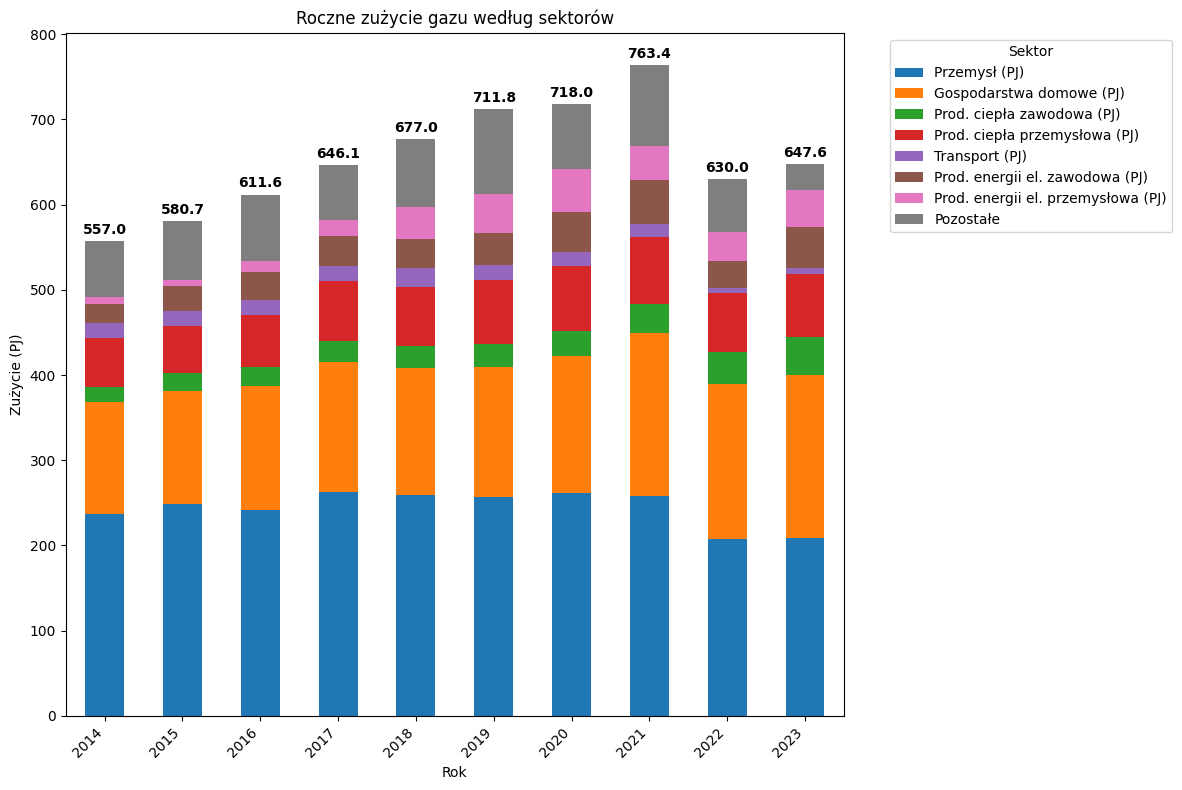

In [ ]:
import matplotlib.pyplot as plt

# Drop the 'Zużycie ogółem (PJ)' column as it represents the total
df_sektor_plot = df_sektor.drop(columns=['Zużycie ogółem (PJ)'])

# Set the 'Rok' column as the index for easier plotting
df_sektor_plot = df_sektor_plot.set_index('Rok')

# Plotting
ax = df_sektor_plot.plot(kind='bar', stacked=True, figsize=(12, 8))

# Add total labels on top of each bar
totals = df_sektor_plot.sum(axis=1)
for i, total in enumerate(totals):
    ax.text(i, total + 5, f'{total:.1f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title('Roczne zużycie gazu według sektorów')
plt.xlabel('Rok')
plt.ylabel('Zużycie (PJ)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sektor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



### Budowa prognozy probabilistycznej z wykorzystaniem Jackkniffe+ i conformal prediction

> Mamy zatem osiem krótkich szeregów czasowych opisujących sektory.

**Jak zbudować prognozę dla krótkiego szeregu czasowego:**
"The only theoretical limit is that we need more observations than there are parameters in our forecasting model. However, with short series, there is not enough data to allow some observations to be withheld for testing purposes, and even time series cross validation can be difficult to apply. The AICc is particularly useful here, because it is a proxy for the one-step forecast out-of-sample MSE. Anything with more than one or two parameters will produce poor forecasts due to the estimation error." Źródło: https://otexts.com/fpppy/nbs/13-practical.html#sec-long-short-ts

> Z powyższego wynika, że mamy do wyboru proste modele typu liniowego, ew. Holt, ale z wygaszonym trendem. I dopasowujemy AIC


> **Dlatego dla każdej prognozy sektorowej budujemy jackknife+**

**Jackknife+** to metoda szacowania przedziałów niepewności dla prognoz, oparta na idei usuwania po jednym punkcie z danych i sprawdzania, jak zmienia się model. W przeciwieństwie do klasycznego Jackknife’a, Jackknife+ daje przedziały predykcyjne, które mają określony poziom pokrycia nawet przy małych próbkach i w nieliniowych modelach.

###  Jak działa Jackknife+?
Masz 10 punktów szeregów czasowych i chcesz dopasować regresję liniową i oszacować przedział niepewności tej prognozy.

1. **Iteracyjne dopasowanie modeli:** Tworzysz 10 modeli regresji, za każdym razem usuwając 1 punkt z danych (tzw. "leave-one-out").
2. **Generowanie prognoz:** Każdy z 10 modeli używasz do prognozowania 11-tego punktu (czyli wartości y dla x=11).
3. **Obliczenie przedziału Jackknife+:** Dla każdego z tych 10 modeli obliczasz resztę (błąd predykcji) na usuniętym punkcie. Tworzysz 10 par: (prognoza ± reszta) – to są możliwe wartości przyszłej obserwacji. Z tych 10 wartości wybierasz np. 5-ty i 95-ty percentyl (dla 90% pokrycia) – to jest Twój przedział predykcyjny. Prognoza punktowa do reszta.

> Kod poniżej dopasowuje prostą regresję liniową do każdego sektora i przeprowadza na nim Jackknife+. Metoda zwraca 2 wektory - parametry poszczególnych modeli oraz dopasowanego modelu



In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from scipy.optimize import curve_fit

def calculate_aic(y_true, y_pred, k):
    n = len(y_true)
    res = y_true - y_pred
    sse = np.sum(res ** 2)
    return n * np.log(sse / n) + 2 * k

def _logistic(t, L, k, t0):
    return L / (1.0 + np.exp(-k * (t - t0)))

def fit_model(t, y, model="linear"):
    model = model.lower()
    if model == "linear":
        reg = LinearRegression().fit(t, y)
        y_hat = reg.predict(t)
        return reg, y_hat, 2
    if model.startswith("ets"):
        trend = None
        damped = False
        if model == "ets_aan":
            trend = "add"
        elif model == "ets_aad":
            trend = "add"
            damped = True
        ets = ExponentialSmoothing(
            y, trend=trend, damped_trend=damped,
            seasonal=None, initialization_method="estimated"
        ).fit()
        y_hat = ets.fittedvalues
        return ets, y_hat, len(ets.params)
    if model == "logistic":
        p0 = (y.max() * 1.05, 1.0, np.median(t))
        popt, _ = curve_fit(_logistic, t.flatten(), y, p0=p0, maxfev=10_000)
        y_hat = _logistic(t.flatten(), *popt)
        return popt, y_hat, 3
    if model.startswith("arima"):
        order = tuple(map(int, model.replace("arima_", "").split("_")))
        arima_mod = ARIMA(y, order=order).fit()
        y_hat = arima_mod.fittedvalues
        k = len(arima_mod.params)
        return arima_mod, y_hat, k
        # ---- Grey GM(1,1) ----
    if model == "grey":
        # Krok 1: AGO (Accumulated Generating Operation)
        y_ago = np.cumsum(y)

        # Krok 2: Budowa macierzy B i Y
        z = -0.5 * (y_ago[:-1] + y_ago[1:])
        B = np.column_stack((z, np.ones(len(z))))
        Y = y[1:]

        # Krok 3: Estymacja a, b
        a_b = np.linalg.lstsq(B, Y, rcond=None)[0]
        a, b = a_b

        # Krok 4: Generowanie dopasowania
        def grey_hat(k):
            return (y[0] - b / a) * np.exp(-a * k) + b / a

        y_hat_ago = np.array([grey_hat(k) for k in range(len(y))])
        y_hat = np.empty_like(y)
        y_hat[0] = y[0]
        y_hat[1:] = np.diff(y_hat_ago)

        # Zwracamy parametry i prognozę
        return (y[0], a, b, len(y)), y_hat, 2
    raise ValueError(f"Nieznany model: {model}")

def _forecast_h_steps(fitted, last_idx, h, model_type):
    if model_type == "linear":
        return float(fitted.predict([[last_idx + h]])[0])
    if model_type.startswith("ets"):
        return float(fitted.forecast(h)[-1])
    if model_type == "logistic":
        L, k, t0 = fitted
        return float(_logistic(np.array([last_idx + h]), L, k, t0)[0])
    if model_type.startswith("arima"):
        return float(fitted.forecast(steps=h)[-1])
    if model_type == "grey":
        y0, a, b, n_obs = fitted
        # AGO prognoza na n_obs + h
        grey_hat = (y0 - b / a) * np.exp(-a * (n_obs + h - 1)) + b / a
        prev_hat = (y0 - b / a) * np.exp(-a * (n_obs + h - 2)) + b / a
        return float(grey_hat - prev_hat)
    raise ValueError("Nieznany model.")

# ────────────────────────────────────────────────────────────
# 1.  jackknife_cp_forecast  – angielskie nazwy kolumn
# ────────────────────────────────────────────────────────────
def jackknife_cp_forecast(df, column, horizon=5, alpha=0.10, model_type="linear"):
    y = df[column].astype(float).values
    t = np.arange(len(y)).reshape(-1, 1)
    n = len(y)
    last_idx = n - 1

    full_mod, y_hat_full, k_full = fit_model(t, y, model_type)

    mu_preds, abs_residuals, details = [], [], []
    for i in range(n):
        mask = np.arange(n) != i
        t_i, y_i = t[mask], y[mask]
        mod_i, _, _ = fit_model(t_i, y_i, model_type)
        mu_i = _forecast_h_steps(mod_i, last_idx, horizon, model_type)
        mu_preds.append(mu_i)

        try:
            y_hat_lo = _forecast_h_steps(mod_i, i - 1, 1, model_type)
            abs_residuals.append(abs(y[i] - y_hat_lo))
        except:
            abs_residuals.append(np.nan)

        details.append({
            "left_out_index": i,
            "y_left_out": y[i],
            "forecast_h": mu_i
        })

    mu_preds = np.array(mu_preds)
    abs_residuals = np.array([a for a in abs_residuals if not np.isnan(a)])

    # ── epistemic ────────────────────────────
    low_ep  = np.quantile(mu_preds,  alpha / 2)
    high_ep = np.quantile(mu_preds, 1 - alpha / 2)
    width_ep = high_ep - low_ep

    # ── aleatoric ───────────────────────────
    k_rank = int(np.ceil((n + 1) * (1 - alpha))) - 1
    q_alea = np.sort(abs_residuals)[min(k_rank, len(abs_residuals) - 1)]
    width_alea = 2 * q_alea                          # ± q_alea

    # ── combined conformal ──────────────────
    lower_cp = low_ep  - q_alea
    upper_cp = high_ep + q_alea
    width_total = upper_cp - lower_cp               # = width_ep + width_alea

    summary_df = pd.DataFrame({
        "Model":                [model_type],
        "AIC":                  [calculate_aic(y, y_hat_full, k_full)],
        "MAE":                  [mean_absolute_error(y, y_hat_full)],
        "Mean epistemic width": [width_ep],
        "Mean aleatoric width": [width_alea],
        "Mean total width":     [width_total],
        # poniższe zostawiam (do debugowania / wglądu)
        "Epistemic low":  [low_ep],
        "Epistemic high": [high_ep],
        "Aleatoric margin": [q_alea],
        f"Conformal low (1-{alpha})":  [lower_cp],
        f"Conformal high (1-{alpha})": [upper_cp],
    })

    return summary_df, pd.DataFrame(details)

# ────────────────────────────────────────────────────────────
# 2.  evaluate_all_models  – angielskie kolumny
# ────────────────────────────────────────────────────────────
def evaluate_all_models(df, column,
                        model_list=None,
                        horizon=5, alpha=0.10):
    """
    Compare models on AIC, MAE and mean widths (epistemic, aleatoric, total).

    Returns a DataFrame with one row per model.
    """
    if model_list is None:
        model_list = ['linear', 'logistic', 'grey']

    results = []
    for model in model_list:
        try:
            summary_df, _ = jackknife_cp_forecast(
                df=df, column=column,
                horizon=horizon, alpha=alpha,
                model_type=model
            )
            keep = ["Model", "AIC", "MAE",
                    "Mean epistemic width",
                    "Mean aleatoric width",
                    "Mean total width"]
            results.append(summary_df[keep].iloc[0].to_dict())
        except Exception as e:
            results.append({
                "Model": model,
                "AIC": np.nan, "MAE": np.nan,
                "Mean epistemic width": np.nan,
                "Mean aleatoric width": np.nan,
                "Mean total width": np.nan,
                "Error": str(e)
            })
    return pd.DataFrame(results)



def evaluate_models_for_all_columns(df, exclude_columns=None, horizon=5, alpha=0.10):
    """
    Wywołuje evaluate_all_models dla wszystkich kolumn poza podanymi w exclude_columns.

    Parametry:
        df              – DataFrame wejściowy
        exclude_columns – lista kolumn do pominięcia (np. identyfikatory, zmienne nieciągłe)
        horizon         – liczba kroków prognozy
        alpha           – poziom niepewności dla przedziałów

    Zwraca:
        DataFrame z porównaniem modeli dla każdej kolumny
    """
    if exclude_columns is None:
        exclude_columns = []

    all_results = []
    for col in df.columns:
        if col in exclude_columns:
            continue

        try:
            result_df = evaluate_all_models(df, column=col, horizon=horizon, alpha=alpha)
            result_df.insert(0, 'Kolumna', col)
            all_results.append(result_df)
        except Exception as e:
            error_row = {
                'Kolumna': col,
                'Model': 'ALL',
                'Error': str(e)
            }
            all_results.append(pd.DataFrame([error_row]))

    return pd.concat(all_results, ignore_index=True)



# Lista kolumn do pominięcia
excluded = ['Rok']

# Wywołanie oceny modeli dla pozostałych kolumn
#results_df = evaluate_models_for_all_columns(df_sektor, exclude_columns=excluded, horizon=5, alpha=0.10)
# display(results_df)

# Przykład: kolumna 'Sprzedaż', trzy modele
my_models = ['linear', 'logistic', 'grey']
wyniki = evaluate_all_models(df_sektor, column='Gospodarstwa domowe (PJ)',
                             model_list=my_models,
                             horizon=5, alpha=0.10)
display(wyniki)


,Model,AIC,MAE,Mean epistemic width,Mean aleatoric width,Mean total width
0,linear,42.858677,5.575636,7.039475,36.841176,43.880652
1,logistic,44.040596,5.320835,7.995026,37.177663,45.172690
2,grey,41.851793,5.089871,19.560508,137.993266,157.553774


,Year,Point,Ep_low,Ep_high,Aleatoric_margin,Conf_low,Conf_high
0,2024,720.742020,696.708965,744.775076,141.265409,555.443556,886.040485
1,2025,733.260257,703.404827,763.115687,141.265409,562.139418,904.381096
2,2026,745.245450,708.582073,781.908828,141.265409,567.316664,923.174236
3,2027,757.481554,713.797424,801.165685,141.265409,572.532016,942.431093
4,2028,769.974442,719.051162,820.897722,141.265409,577.785753,962.163130
5,2029,782.730128,724.343569,841.116688,141.265409,583.078160,982.382096
6,2030,795.754775,729.674929,861.834620,141.265409,588.409521,1003.100029
7,2031,809.054694,735.045530,883.063858,141.265409,593.780121,1024.329266
8,2032,822.636351,740.455660,904.817043,141.265409,599.190251,1046.082451
9,2033,836.506370,745.905609,927.107130,141.265409,604.640201,1068.372539


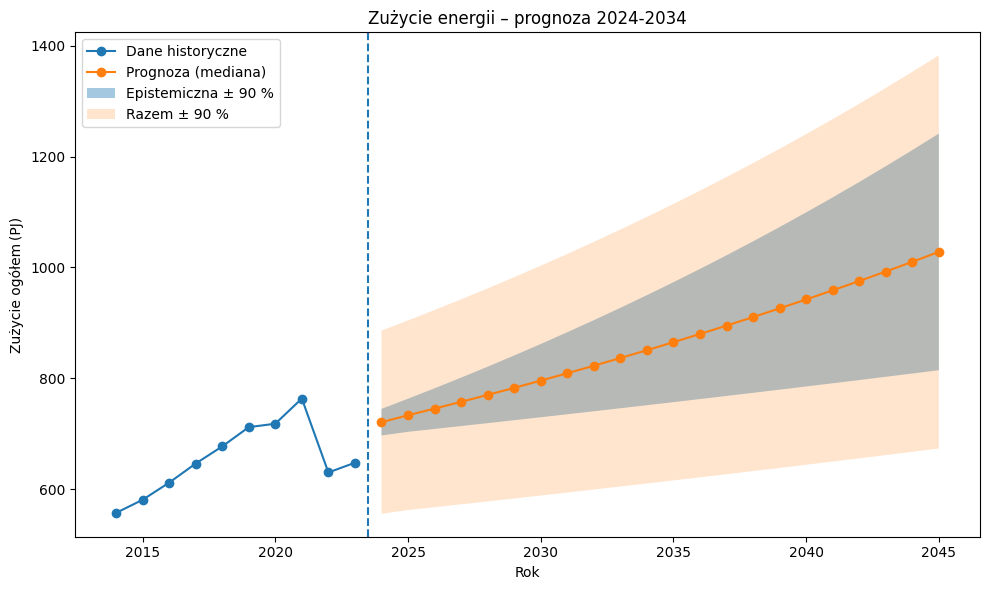

In [ ]:
# ==============================================================================
# 1) forecast_range_decomp  – zachowuje ROZDZIELONE niepewności
# ==============================================================================
def forecast_range_decomp(
    df: pd.DataFrame,
    column: str,
    start_year: int,
    end_year: int,
    alpha: float = 0.10,
    model_type: str = "linear"
) -> pd.DataFrame:
    """
    Build a year-by-year table with:
        • point forecast
        • epistemic interval (low / high)
        • aleatoric margin
        • final conformal interval (low / high)

    Parameters
    ----------
    df : pd.DataFrame
        Input data frame, must contain a 'Rok' (year) column.
    column : str
        Target series to forecast.
    start_year, end_year : int
        Inclusive range of calendar years for which to generate forecasts.
    alpha : float, default 0.10
        Miscoverage level for conformal intervals (e.g. 0.10 ⇒ 90 %).
    model_type : str, default "linear"
        One of the models supported by `jackknife_cp_forecast`.

    Returns
    -------
    pd.DataFrame
        One row per year with columns:
        ['Year', 'Point', 'Ep_low', 'Ep_high',
         'Aleatoric_margin', 'Conf_low', 'Conf_high']
    """
    last_year = int(df["Rok"].iloc[-1])
    rows = []

    for year in range(start_year, end_year + 1):
        h = year - last_year
        summary_df, _ = jackknife_cp_forecast(
            df=df,
            column=column,
            horizon=h,
            alpha=alpha,
            model_type=model_type
        )

        # --- robust retrieval of point forecast --------------------------
        point_key = f"Point forecast (t+{h})"
        if point_key in summary_df.columns:
            point_val = float(summary_df.at[0, point_key])
        else:
            # fallback: midpoint of epistemic interval
            ep_low  = float(summary_df.at[0, "Epistemic low"])
            ep_high = float(summary_df.at[0, "Epistemic high"])
            point_val = 0.5 * (ep_low + ep_high)

        row = {
            "Year":               year,
            "Point":              point_val,
            "Ep_low":             float(summary_df.at[0, "Epistemic low"]),
            "Ep_high":            float(summary_df.at[0, "Epistemic high"]),
            "Aleatoric_margin":   float(summary_df.at[0, "Aleatoric margin"]),
            "Conf_low":           float(summary_df.at[0,
                                          f"Conformal low (1-{alpha})"]),
            "Conf_high":          float(summary_df.at[0,
                                          f"Conformal high (1-{alpha})"])
        }
        rows.append(row)

    return pd.DataFrame(rows)


# ==============================================================================
# 2) plot_forecast_decomp  – jednoczesny rysunek dwóch pasm niepewności
# ==============================================================================
def plot_forecast_decomp(
    df_hist: pd.DataFrame,
    forecast_df: pd.DataFrame,
    column: str,
    alpha: float = 0.10,
    title: str | None = None
):
    """
    Wykres:
        – dane historyczne,
        – punktowa prognoza (mediana),
        – węższy pas (epistemic: Ep_low–Ep_high),
        – szerszy pas (razem: Conf_low–Conf_high).
    """
    import matplotlib.pyplot as plt
    x_hist = df_hist["Rok"].to_numpy()
    y_hist = df_hist[column].astype(float).to_numpy()

    x_fore   = forecast_df["Year"].to_numpy()
    y_point  = forecast_df["Point"].to_numpy()
    ep_low   = forecast_df["Ep_low"].to_numpy()
    ep_high  = forecast_df["Ep_high"].to_numpy()
    cf_low   = forecast_df["Conf_low"].to_numpy()
    cf_high  = forecast_df["Conf_high"].to_numpy()

    plt.figure(figsize=(10, 6))
    plt.plot(x_hist, y_hist, marker="o", label="Dane historyczne")
    plt.plot(x_fore, y_point, marker="o", label="Prognoza (mediana)")

    # pasmo epistemiczne (ciemniejsze)
    plt.fill_between(x_fore, ep_low, ep_high, alpha=0.40,
                     label=f"Epistemiczna ± {int((1-alpha)*100)} %")

    # pasmo łączne (jaśniejsze)
    plt.fill_between(x_fore, cf_low, cf_high, alpha=0.20,
                     label=f"Razem ± {int((1-alpha)*100)} %")

    plt.axvline(x_hist[-1] + 0.5, linestyle="--")
    plt.xlabel("Rok")
    plt.ylabel(column)
    plt.title(title or f"Prognoza {column}")
    plt.legend()
    plt.tight_layout()
    plt.show()


col_total = "Zużycie ogółem (PJ)"

# Tabela prognoz 2024-2034 z rozbiciem niepewności
forecast_df = forecast_range_decomp(df_sektor, col_total,
                                    start_year=2024, end_year=2045,
                                    alpha=0.10, model_type="grey")

display(forecast_df)

# Wykres obu pasm
plot_forecast_decomp(df_sektor, forecast_df, col_total,
                     alpha=0.10,
                     title="Zużycie energii – prognoza 2024-2034")



# Porównanie wyników
Porównanie wyników p-box dla prognozy scenariuszowej opartej o modele oraz prognozy danej liczbą rozmytą opartej o prognozę scenariuszową gaz-systemu - czyli 2 p-boxy.

Prezentacją niepewności będzie p-box. **P-box** (probability box) to narzędzie reprezentujące niepewność w postaci przedziału funkcji dystrybuanty, który uwzględnia zarówno niepewność aleatoryczną (związaną z losowością zjawiska), jak i epistemiczną (wynikającą z niepełnej wiedzy o parametrach lub modelu). Dolna i górna funkcja dystrybuanty w p-boxie ograniczają zbiór możliwych rozkładów prawdopodobieństwa zgodnych z dostępnymi danymi i założeniami. Niepewność aleatoryczna odzwierciedla zmienność losową obserwacji przy założonym modelu, natomiast epistemiczna wpływa na kształt i położenie granic p-boxa poprzez niejednoznaczność parametrów lub struktury modelu.


# Ekspercka prognoza zużycia gazu


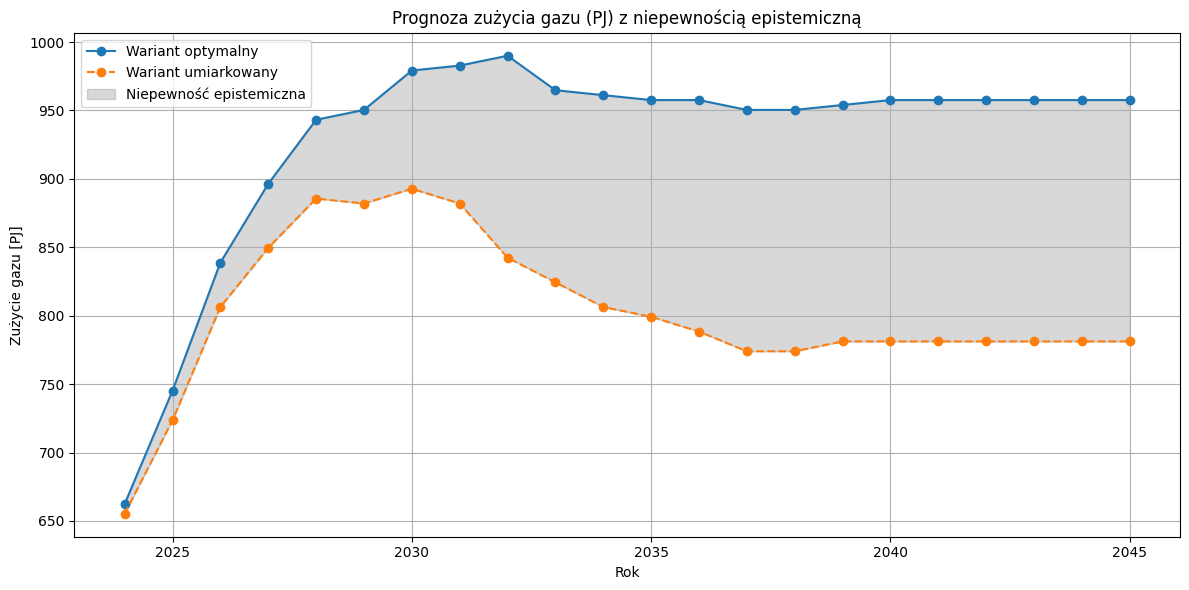

In [ ]:
df_forecast = pd.DataFrame({
    "Rok": [
        2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034,
        2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045
    ],
    "Wariant_optymalny_PJ": [
        662.4, 745.2, 838.8, 896.4, 943.2, 950.4, 979.2, 982.8, 990.0,
        964.8, 961.2, 957.6, 957.6, 950.4, 950.4, 954.0, 957.6, 957.6,
        957.6, 957.6, 957.6, 957.6
    ],
    "Wariant_umiarkowany_PJ": [
        655.2, 723.6, 806.4, 849.6, 885.6, 882.0, 892.8, 882.0, 842.4,
        824.4, 806.4, 799.2, 788.4, 774.0, 774.0, 781.2, 781.2, 781.2,
        781.2, 781.2, 781.2, 781.2
    ]
})


# Uzupełniamy dane PJ do DataFrame
df_forecast["Wariant_optymalny_PJ"] = [
    662.4, 745.2, 838.8, 896.4, 943.2, 950.4, 979.2, 982.8, 990.0,
    964.8, 961.2, 957.6, 957.6, 950.4, 950.4, 954.0, 957.6, 957.6,
    957.6, 957.6, 957.6, 957.6
]

df_forecast["Wariant_umiarkowany_PJ"] = [
    655.2, 723.6, 806.4, 849.6, 885.6, 882.0, 892.8, 882.0, 842.4,
    824.4, 806.4, 799.2, 788.4, 774.0, 774.0, 781.2, 781.2, 781.2,
    781.2, 781.2, 781.2, 781.2
]

# Wywołanie funkcji dla danych w PJ

def plot_epistemic_forecast(df, col_opt, col_mod, unit="PJ"):
    """
    Rysuje wykres prognozy z niepewnością epistemiczną na podstawie dwóch wariantów prognozy.

    Parameters:
    - df: pandas.DataFrame zawierający kolumnę 'Rok' oraz dwie kolumny z prognozami
    - col_opt: nazwa kolumny z wariantem optymalnym
    - col_mod: nazwa kolumny z wariantem umiarkowanym
    - unit: jednostka prognozy do oznaczenia na osi Y (domyślnie "PJ")
    """
    import matplotlib.pyplot as plt
    import numpy as np

    rok = df["Rok"].to_numpy(dtype=float)
    optymalny = df[col_opt].to_numpy(dtype=float)
    umiarkowany = df[col_mod].to_numpy(dtype=float)

    plt.figure(figsize=(12, 6))
    plt.plot(rok, optymalny, label="Wariant optymalny", linestyle='-', marker='o')
    plt.plot(rok, umiarkowany, label="Wariant umiarkowany", linestyle='--', marker='o')
    plt.fill_between(rok, umiarkowany, optymalny, color='gray', alpha=0.3, label="Niepewność epistemiczna")

    plt.title(f"Prognoza zużycia gazu ({unit}) z niepewnością epistemiczną")
    plt.xlabel("Rok")
    plt.ylabel(f"Zużycie gazu [{unit}]")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Wywołanie funkcji dla danych w PJ
plot_epistemic_forecast(
    df=df_forecast,
    col_opt="Wariant_optymalny_PJ",
    col_mod="Wariant_umiarkowany_PJ",
    unit="PJ"
)



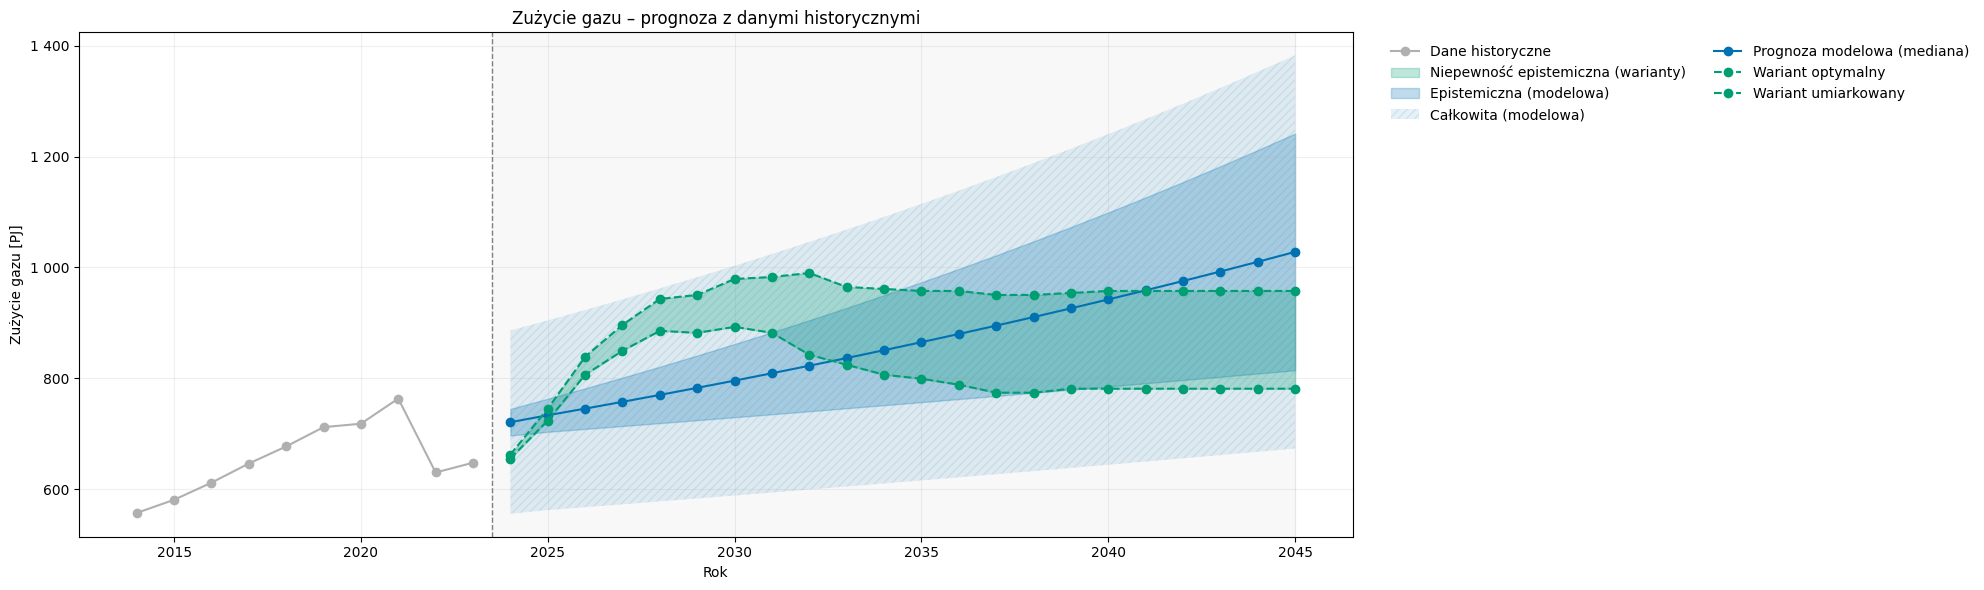

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np



def plot_combined_forecast_with_history(
    df_hist: pd.DataFrame,
    col_hist: str,
    df_epistemic: pd.DataFrame,
    col_opt: str,
    col_mod: str,
    df_statistical: pd.DataFrame,
    title: str = "Prognoza z niepewnością epistemiczną i statystyczną",
    unit: str = "PJ"
):
    """
    Wykres danych historycznych + prognozy z niepewnościami:
      – epistemiczną (warianty),
      – epistemiczną i całkowitą (Jackknife+).
    """

    # === Przygotowanie danych =================================================
    x_hist = df_hist["Rok"].astype(float).to_numpy()
    y_hist = df_hist[col_hist].astype(float).to_numpy()

    x_epi = df_epistemic["Rok"].astype(float).to_numpy()
    y_opt = df_epistemic[col_opt].astype(float).to_numpy()
    y_mod = df_epistemic[col_mod].astype(float).to_numpy()

    x_stat = df_statistical["Year"].astype(float).to_numpy()
    y_point   = df_statistical["Point"].astype(float).to_numpy()
    y_ep_low  = df_statistical["Ep_low"].astype(float).to_numpy()
    y_ep_high = df_statistical["Ep_high"].astype(float).to_numpy()
    y_cf_low  = df_statistical["Conf_low"].astype(float).to_numpy()
    y_cf_high = df_statistical["Conf_high"].astype(float).to_numpy()

    # === Ustawienia estetyczne (dopisz jeden kolor) =============================
    BLUE   = "#0072B2"
    ORANGE = "#E69F00"
    GREEN  = "#009E73"
    HIST   = "#B0B0B0"      # <<< NOWE: bardzo jasny szary dla historii

    forecast_start = x_hist[-1] + 0.5
    width = np.clip(len(np.concatenate((x_hist, x_stat))) * 0.7, 10, 20)

    plt.figure(figsize=(width, 6))

    # Szare tło dla prognoz
    plt.axvspan(forecast_start, max(x_stat), color="lightgrey", alpha=0.15, zorder=0)

    # === Historyczne ==========================================================
    plt.plot(x_hist, y_hist,
             linestyle="-", marker="o", color=HIST ,
             label="Dane historyczne", zorder=3)

    # === Epistemiczna niepewność (warianty) ===================================
    plt.fill_between(x_epi, y_mod, y_opt,
                     color=GREEN, alpha=0.25,
                     label="Niepewność epistemiczna (warianty)", zorder=2)

    # === Model – pasmo epistemiczne & całkowite ===============================
    plt.fill_between(x_stat, y_ep_low, y_ep_high,
                     color=BLUE, alpha=0.25,
                     label="Epistemiczna (modelowa)", zorder=1)

    plt.fill_between(x_stat, y_cf_low, y_cf_high,
                     color=BLUE, alpha=0.10, hatch="////",
                     edgecolor=BLUE, linewidth=0.0,
                     label="Całkowita (modelowa)", zorder=0.5)

    # Prognoza punktowa
    plt.plot(x_stat, y_point,
             linestyle="-", marker="o", color=BLUE,
             label="Prognoza modelowa (mediana)", zorder=4)

    # Linie wariantów
    plt.plot(x_epi, y_opt, linestyle="--", marker='o', color=GREEN,
             label="Wariant optymalny", zorder=4)
    plt.plot(x_epi, y_mod, linestyle="--", marker='o', color=GREEN,
             label="Wariant umiarkowany", zorder=4)

    # Granica prognozy
    plt.axvline(forecast_start, linestyle="--", color="grey", linewidth=1)

    # === Oś X / Y / grid ======================================================
    plt.xlabel("Rok")
    plt.ylabel(f"Zużycie gazu [{unit}]")

    plt.gca().yaxis.set_major_formatter(
        mtick.FuncFormatter(lambda y, _: f"{int(y):,}".replace(",", " "))  # spacja nierozdzielająca
    )
    plt.grid(alpha=0.20)

    # Legenda poza wykresem, 2 kolumny
    plt.legend(loc="upper left", bbox_to_anchor=(1.02, 1),
               frameon=False, ncol=2)

    plt.title(title)
    plt.tight_layout()
    plt.show()

plot_combined_forecast_with_history(
    df_hist=df_sektor,
    col_hist="Zużycie ogółem (PJ)",
    df_epistemic=df_forecast,
    col_opt="Wariant_optymalny_PJ",
    col_mod="Wariant_umiarkowany_PJ",
    df_statistical=forecast_df,
    title="Zużycie gazu – prognoza z danymi historycznymi",
    unit="PJ"
)




In [ ]:
import numpy as np
import pandas as pd

def verify_expert_scenarios(
    df_expert: pd.DataFrame,
    df_stat: pd.DataFrame,
    scenario_cols: list[str] | None = None,
    year_col: str = "Year",
    point_col: str = "Point",
    ep_low: str = "Ep_low",
    ep_high: str = "Ep_high",
    conf_low: str = "Conf_low",
    conf_high: str = "Conf_high",
) -> tuple[pd.DataFrame, pd.DataFrame]:
    """
    Porównuje scenariusze eksperckie z prognozą statystyczną wyposażoną w
    pasma niepewności konformalnej (epistemicznej + aleatorycznej).

    Parameters
    ----------
    df_expert : pd.DataFrame
        Ramka z kolumną *rok* + ≥1 kolumn ze scenariuszami eksperckimi.
    df_stat : pd.DataFrame
        Ramka z kolumnami:
            Year, Point, Ep_low, Ep_high, Conf_low, Conf_high
    scenario_cols : list[str] | None
        Nazwy kolumn w df_expert, które chcesz zweryfikować.
        Gdy None, pobiera wszystkie oprócz kolumny roku.
    year_col, point_col, ep_low, ep_high, conf_low, conf_high : str
        Nazwy kolumn w df_stat (zmieniaj tylko, jeśli różnią się u Ciebie).

    Returns
    -------
    tally_df : pd.DataFrame
        Tabela długiego formatu: Year | Scenario | Expert | Zone (E/A/O) | Distance
    summary_df : pd.DataFrame
        Zbiorcze metryki dla każdego scenariusza:
          in_set_rate, rmse, first_exit_year, share_E, share_A, share_O
    """
    # --- 1. Wstępne porządki -------------------------------------------------
    if scenario_cols is None:
        scenario_cols = [c for c in df_expert.columns if c != year_col]

    # upewniamy się, że rok jest kluczem typu int
    df_expert = df_expert.copy()
    df_stat = df_stat.copy()
    df_expert[year_col] = df_expert["Rok"].astype(int)
    df_stat[year_col]   = df_stat[year_col].astype(int)

    # merge
    merged = pd.merge(df_stat, df_expert[[year_col] + scenario_cols],
                      on=year_col, how="inner", validate="one_to_one")

    # --- 2. Rozwinięcie długie (melt) ---------------------------------------
    long = merged.melt(
        id_vars=[year_col, point_col, ep_low, ep_high, conf_low, conf_high],
        value_vars=scenario_cols,
        var_name="Scenario",
        value_name="Expert"
    )

    # --- 3. Klasyfikacja strefy ---------------------------------------------
    cond_E = (long["Expert"] >= long[ep_low])  & (long["Expert"] <= long[ep_high])
    cond_A = (long["Expert"] >= long[conf_low]) & (long["Expert"] <= long[conf_high])

    long["Zone"] = np.select(
        [cond_E, cond_A],
        ["E", "A"],
        default="O"
    )

    # --- 4. Metryki pomocnicze ----------------------------------------------
    long["Distance"] = (long["Expert"] - long[point_col]).abs()

    def _summarise(group: pd.DataFrame) -> pd.Series:
        in_set = (group["Zone"] != "O")
        share_E = (group["Zone"] == "E").mean()
        share_A = (group["Zone"] == "A").mean()
        rmse = np.sqrt((group["Distance"]**2).mean())

        out_years = group.loc[group["Zone"] == "O", year_col]
        first_exit = out_years.min() if not out_years.empty else np.nan

        return pd.Series({
            "in_set_rate": in_set.mean(),
            "rmse": rmse,
            "first_exit_year": first_exit,
            "share_E": share_E,
            "share_A": share_A,
            "share_O": 1 - share_E - share_A
        })

    summary_df = long.groupby("Scenario").apply(_summarise, include_groups=False).reset_index()

    return long.rename(columns={year_col: "Year"}), summary_df

# zakładam, że:
#   df_forecast  -> Twoje scenariusze eksperckie
#   forecast_df  -> prognoza statystyczna z pasmami konformalnymi

tally, summary = verify_expert_scenarios(
    df_expert=df_forecast,
    df_stat=forecast_df,
    scenario_cols=["Wariant_optymalny_PJ", "Wariant_umiarkowany_PJ"]
)

display(summary)      # szybki podgląd tabeli metryk
display(tally.head()) # pierwsze wiersze klasyfikacji rok-po-roku

<ipython-input-15-c2d18ea73c36>:93: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  summary_df = long.groupby("Scenario").apply(_summarise).reset_index()


,Scenario,in_set_rate,rmse,first_exit_year,share_E,share_A,share_O
0,Wariant_optymalny_PJ,1.0,104.399625,NaN,0.545455,0.454545,5.551115e-17
1,Wariant_umiarkowany_PJ,1.0,130.967136,NaN,0.454545,0.545455,0.000000e+00


,Year,Point,Ep_low,Ep_high,Conf_low,Conf_high,Scenario,Expert,Zone,Distance
0,2024,720.742020,696.708965,744.775076,555.443556,886.040485,Wariant_optymalny_PJ,662.4,A,58.342020
1,2025,733.260257,703.404827,763.115687,562.139418,904.381096,Wariant_optymalny_PJ,745.2,E,11.939743
2,2026,745.245450,708.582073,781.908828,567.316664,923.174236,Wariant_optymalny_PJ,838.8,A,93.554550
3,2027,757.481554,713.797424,801.165685,572.532016,942.431093,Wariant_optymalny_PJ,896.4,A,138.918446
4,2028,769.974442,719.051162,820.897722,577.785753,962.163130,Wariant_optymalny_PJ,943.2,A,173.225558
